In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # model split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kdd-cup-1999-data/kddcup.data.gz
/kaggle/input/kdd-cup-1999-data/training_attack_types
/kaggle/input/kdd-cup-1999-data/kddcup.data.corrected
/kaggle/input/kdd-cup-1999-data/kddcup.newtestdata_10_percent_unlabeled.gz
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled.gz
/kaggle/input/kdd-cup-1999-data/corrected.gz
/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent.gz
/kaggle/input/kdd-cup-1999-data/kddcup.names
/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent_corrected
/kaggle/input/kdd-cup-1999-data/typo-correction.txt
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled_10_percent.gz
/kaggle/input/kdd-cup-1999-data/kddcup.data/kddcup.data
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled/kddcup.testdata.unlabeled
/kaggle/input/kdd-cup-1999-data/corrected/corrected
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled_10_percent/kddcup.testdata.unlabeled_10_percent
/kaggle/input/kdd-cup-1999-data/kddcup.newtestdata_10_percent_unlabeled/kd

In [33]:
# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'Label'])

In [34]:
df = pd.read_csv('/kaggle/input/kdd-cup-1999-data/kddcup.data/kddcup.data',header=None,names=columns)

In [35]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [36]:
# drop columns with less than 3 unique values
# df.drop(['land', 'logged_in', 'root_shell','num_outbound_cmds', 'is_host_login', 'is_guest_login', 'level'], axis=1, inplace=True)
df.drop(['num_outbound_cmds'], axis=1, inplace=True)


In [37]:
# compare the percentage of each label
# (df['Label'].value_counts() / df.shape[0]) * 100
(df['Label'].value_counts())

Label
smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: count, dtype: int64

In [38]:
# take all the normal data and some of the abnormal data so the total data points are 1,000,000
df_normal = df[df['Label'] == 'normal.']
df_abnormal = df[df['Label'] != 'normal.']
for i in range(0,10):
    df_abnormal = df_abnormal.iloc[np.random.permutation(len(df_abnormal))]
    df_normal = df_normal.iloc[np.random.permutation(len(df_normal))]
df_abnormal = df_abnormal.sample(1000000 - df_normal.shape[0])

In [39]:
df_normal.shape, df_abnormal.shape

((972781, 41), (27219, 41))

In [50]:
df_normal

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Label
1056914,0,udp,domain_u,SF,42,42,0,0,0,0,...,253,0.99,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal.
4873818,2895,udp,other,SF,147,105,0,0,0,0,...,4,0.02,0.45,0.84,0.00,0.0,0.0,0.0,0.0,normal.
4791014,0,tcp,http,SF,320,1912,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,normal.
405983,1,tcp,smtp,SF,1164,376,0,0,0,0,...,206,0.73,0.03,0.01,0.01,0.0,0.0,0.0,0.0,normal.
14111,0,tcp,http,SF,157,2354,0,0,0,0,...,255,1.00,0.00,0.02,0.03,0.0,0.0,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780666,0,tcp,http,SF,218,1255,0,0,0,0,...,255,1.00,0.00,0.03,0.07,0.0,0.0,0.0,0.0,normal.
158517,0,tcp,http,SF,327,1637,0,0,0,0,...,119,1.00,0.00,0.04,0.10,0.0,0.0,0.0,0.0,normal.
311650,0,tcp,http,SF,310,1408,0,0,0,0,...,255,1.00,0.00,0.01,0.00,0.0,0.0,0.0,0.0,normal.
4542781,2630,udp,other,SF,147,105,0,0,0,0,...,1,0.00,0.86,1.00,0.00,0.0,0.0,0.0,0.0,normal.


In [48]:
df_abnormal

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Label
2806696,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
2428700,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
3923962,0,tcp,private,S0,0,0,0,0,0,0,...,14,0.05,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
3086903,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
2800315,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651682,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
4738433,0,tcp,private,REJ,0,0,0,0,0,0,...,6,0.02,0.07,0.0,0.0,0.0,0.0,1.0,1.0,neptune.
2615673,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
3613244,0,tcp,private,S0,0,0,0,0,0,0,...,6,0.02,0.06,0.0,0.0,1.0,1.0,0.0,0.0,neptune.


In [132]:
# combine the normal and abnormal data
df = pd.concat([df_normal, df_abnormal])
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Label
1056914,0,udp,domain_u,SF,42,42,0,0,0,0,...,253,0.99,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal.
4873818,2895,udp,other,SF,147,105,0,0,0,0,...,4,0.02,0.45,0.84,0.00,0.0,0.0,0.0,0.0,normal.
4791014,0,tcp,http,SF,320,1912,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,normal.
405983,1,tcp,smtp,SF,1164,376,0,0,0,0,...,206,0.73,0.03,0.01,0.01,0.0,0.0,0.0,0.0,normal.
14111,0,tcp,http,SF,157,2354,0,0,0,0,...,255,1.00,0.00,0.02,0.03,0.0,0.0,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651682,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
4738433,0,tcp,private,REJ,0,0,0,0,0,0,...,6,0.02,0.07,0.00,0.00,0.0,0.0,1.0,1.0,neptune.
2615673,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
3613244,0,tcp,private,S0,0,0,0,0,0,0,...,6,0.02,0.06,0.00,0.00,1.0,1.0,0.0,0.0,neptune.


In [133]:
# compare the percentage of each label
# (df['Label'].value_counts() / df.shape[0]) * 100
(df['Label'].value_counts())

Label
normal.             972781
smurf.               19409
neptune.              7491
satan.                 104
portsweep.              90
ipsweep.                83
nmap.                   13
warezclient.             9
teardrop.                8
back.                    8
pod.                     2
warezmaster.             1
buffer_overflow.         1
Name: count, dtype: int64

In [134]:
for f in range(0,10):
    df = df.iloc[np.random.permutation(len(df))]

In [135]:
# split X and y data
x = df.drop('Label', axis = 1)
y = df['Label']

In [138]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    RobustScaler,
    StandardScaler,
)
categorical_columns = ["protocol_type", "service", "flag"]

ordinal_encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1
)
preprocessor = ColumnTransformer(
    transformers=[
        ("categorical", ordinal_encoder, categorical_columns),
    ],
    remainder="passthrough",
)
x = preprocessor.fit_transform(x)
y = np.where(y == 'normal.',1,0) # anomaly = 0, normal = 1

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x ,y , test_size = 0.2, random_state = 42)
x_train = df_normal.drop('Label', axis = 1) # remake x_train with only normal data
x_train = preprocessor.fit_transform(x_train) 

In [140]:
iforest = IsolationForest(n_estimators=100, bootstrap=True, random_state=42)
iforest.fit(x_train)
y_pred1 = iforest.predict(x_test)
y_pred1 = np.where(y_pred1 == 1, 1, 0) # normal = 1, anomaly = 0
y_pred2 = iforest.decision_function(x_test) # negative : outliers, positive : inliers

In [141]:
y_pred1

array([1, 1, 1, ..., 1, 1, 1])

In [148]:
y_pred2

array([0.14855923, 0.14351965, 0.08020055, ..., 0.14408976, 0.10796914,
       0.14293996])

In [143]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

In [144]:
from sklearn.metrics import classification_report
print("Printing the classification report with fixed parameters...")
print(classification_report(y_test, y_pred1))

Printing the classification report with fixed parameters...
              precision    recall  f1-score   support

           0       0.21      1.00      0.35      5331
           1       1.00      0.90      0.95    194669

    accuracy                           0.90    200000
   macro avg       0.61      0.95      0.65    200000
weighted avg       0.98      0.90      0.93    200000



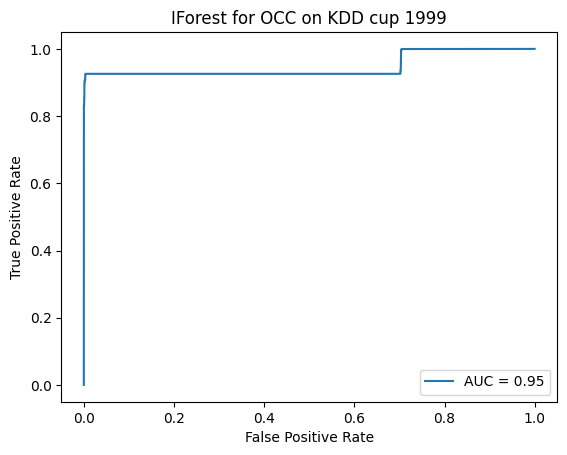

In [145]:
import math
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
curve = RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc)
curve.plot()
plt.title("IForest for OCC on KDD cup 1999")
plt.show()

In [146]:
from sklearn.metrics import roc_auc_score
auc1 = roc_auc_score(y_test, y_pred1)
auc2 = roc_auc_score(y_test, y_pred2)
print("AUC score (discrete prediction): ", auc1 * 100)
print("AUC score (continuous prediction):", auc2 * 100)

AUC score (discrete prediction):  94.78367605847696
AUC score (continuous prediction): 94.77225683187118


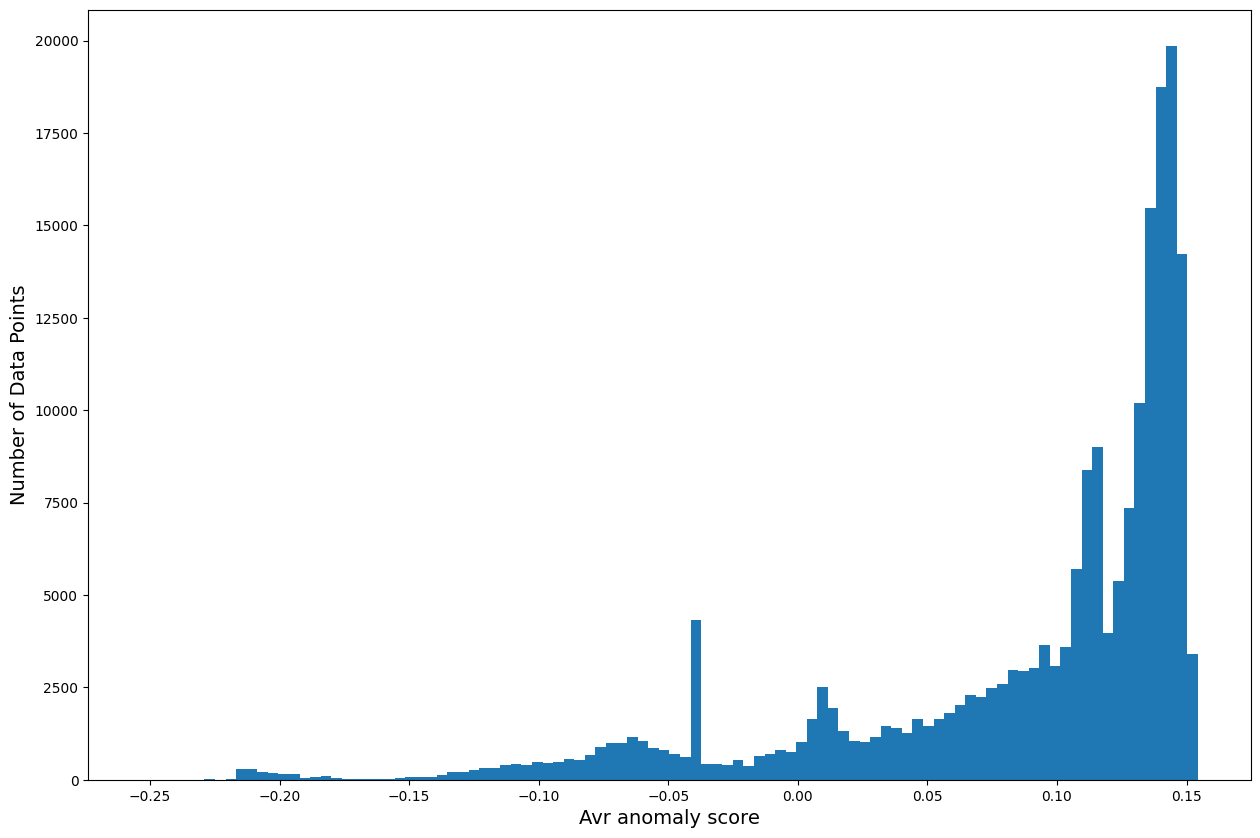

In [147]:
plt.figure(figsize = (15, 10))

plt.hist(y_pred2, bins=100)

plt.xlabel('Avr anomaly score', fontsize=14)

plt.ylabel('Number of Data Points', fontsize=14)

plt.show()